In [1]:
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils.generate_phrases import generate_random_phrase, alphabet

In [2]:
# Time Analysis
phrase_size = int(1e2)

t1 = time.time()
new_phrase = generate_random_phrase(phrase_size, alphabet)
t2 = time.time()

print(f"Took {t2 - t1} seconds to generate a phrase with {phrase_size} letters using sequential")

# t1 = time.time()
# new_phrase = generate_random_phrase(phrase_size, alphabet, parallel=True)
# t2 = time.time()

# print(f"Took {t2 - t1} seconds to generate a phrase with {phrase_size} letters using parallel")

Took 9.846687316894531e-05 seconds to generate a phrase with 100 letters using sequential


In [3]:
def generate_phrases(phrase:str, log_gen:bool=False):
    for letter in phrase:
        if letter not in alphabet:
            raise ValueError(f"Letter {letter} not in alphabet")
    
    phrase_size = len(phrase)
    gen:int = 0
    while True:
        new_phrase = generate_random_phrase(phrase_size, alphabet)
        gen += 1
        
        if new_phrase == phrase:
            break

        if gen % 100000 == 0 and log_gen:
            print(f'Generation: {gen:,}')
    
    return gen

Found "G" in 6 generations
Found "GA" in 26 generations
Found "GAG" in 84 generations
Found "GAGC" in 1,008 generations
Found "GAGCC" in 109 generations
Found "GAGCCC" in 1,256 generations
Took 0.01026606559753418 seconds to find all the phrases


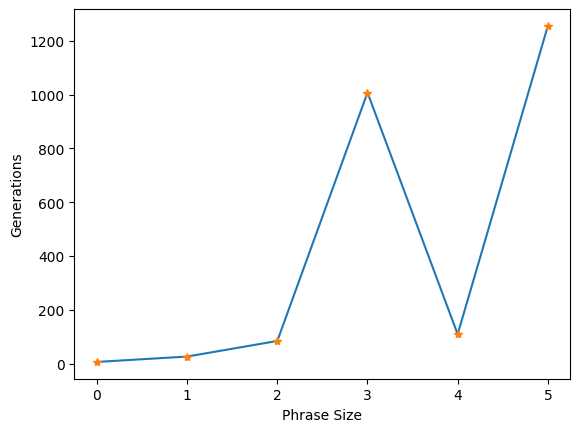

In [4]:
# phrase = 'banan'
phrase = 'GAGCCC'#TCAATCAGGCATACC'

phrase_i = ''
gens = []

t1 = time.time()
for letter in phrase:
    phrase_i += letter
    gen = generate_phrases(phrase_i)

    gens.append(gen)
    print(f'Found "{phrase_i}" in {gen:,} generations')
t2 = time.time()

print(f"Took {t2 - t1} seconds to find all the phrases")

plt.plot(gens)
plt.plot(gens, '*')
plt.xlabel('Phrase Size')
plt.ylabel('Generations')
plt.show()

In [5]:
# phrase = 'bana'
phrase = 'GAGCCC'#TCAATCAGGCA'#TACC'
size_exp = 30

gens_list = []
for i in range(size_exp):
    t1 = time.time()
    gen = generate_phrases(phrase)
    t2 = time.time()

    gens_list.append(gen)
    print(f'Found "{phrase}" in {gen:,} generations and took {round(t2 - t1, 4):,} seconds')

med_gen = np.mean(gens_list)

print(f'Mean generations: {med_gen:,}')

Found "GAGCCC" in 4,102 generations and took 0.0178 seconds
Found "GAGCCC" in 3,076 generations and took 0.0123 seconds
Found "GAGCCC" in 838 generations and took 0.0031 seconds
Found "GAGCCC" in 751 generations and took 0.0028 seconds
Found "GAGCCC" in 3,304 generations and took 0.0126 seconds
Found "GAGCCC" in 3,411 generations and took 0.0125 seconds
Found "GAGCCC" in 1,310 generations and took 0.0053 seconds
Found "GAGCCC" in 2,731 generations and took 0.0099 seconds
Found "GAGCCC" in 3,470 generations and took 0.0148 seconds
Found "GAGCCC" in 995 generations and took 0.0043 seconds
Found "GAGCCC" in 777 generations and took 0.0046 seconds
Found "GAGCCC" in 243 generations and took 0.0015 seconds
Found "GAGCCC" in 1,506 generations and took 0.0071 seconds
Found "GAGCCC" in 5,405 generations and took 0.02 seconds
Found "GAGCCC" in 152 generations and took 0.0006 seconds
Found "GAGCCC" in 6,951 generations and took 0.0256 seconds
Found "GAGCCC" in 1,983 generations and took 0.0073 se

       Generations
count    30.000000
mean   2900.133333
std    2341.913596
min      82.000000
25%     792.250000
50%    2903.500000
75%    3981.500000
max    8332.000000


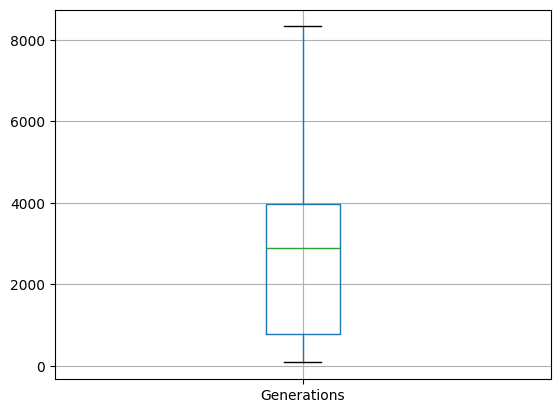

In [10]:
# Add Boxplot
d = {
    "Generations": gens_list
}

df = pd.DataFrame(d)

print(df.describe())

df.boxplot()
plt.show()